In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-laplace-fd)

We make a crude discretization for illustrative purposes.

In [2]:
m, n = 5, 6
x, Dx, Dxx = FNC.diffmat2(m, [0, 3])
y, Dy, Dyy = FNC.diffmat2(n, [-1, 1])
mtx, X, Y, vec, unvec, is_boundary = FNC.tensorgrid(x, y)

Next, we define $\phi$ and evaluate it on the grid to get the forcing vector of the linear system.

In [3]:
f = lambda x, y: x**2 - y + 2
b = vec(mtx(f))

Here are the coefficients for the PDE collocation, before any modifications are made for the boundary conditions. The combination of Kronecker products and finite differences produces a characteristic sparsity pattern.

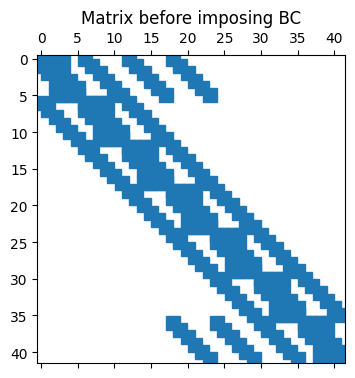

In [4]:
import scipy.sparse as sp
Dxx = sp.lil_matrix(Dxx)
Dyy = sp.lil_matrix(Dyy)
Ix = sp.eye(m+1)
Iy = sp.eye(n+1)
A = sp.kron(Iy, Dxx) + sp.kron(Dyy, Ix)

spy(A)
title("Matrix before imposing BC");

The number of equations is equal to $(m+1)(n+1)$, which is the total number of points on the grid.

In [5]:
N = len(b)

We now use the Boolean array that indicates where the boundary points lie in the grid.

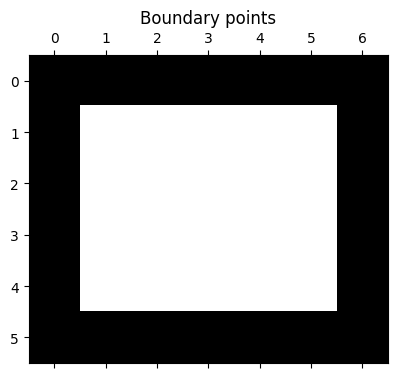

In [6]:
spy(is_boundary)
title("Boundary points");

In order to impose Dirichlet boundary conditions, we replace the boundary rows of the system by rows of the identity.
```{tip}
:class: dropdown
Changing rows of a sparse array requires that the operands be in a particular sparse representation called `lil`. The conversion isn't done automatically because it can be slow and you are encouraged to avoid it when possible. We're just trying to keep things conceptually simple here.
```

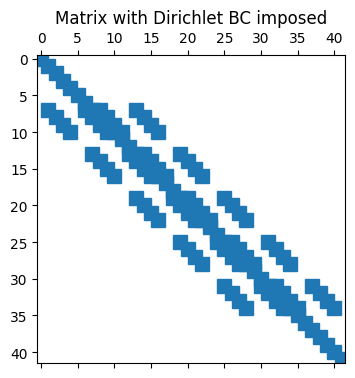

In [7]:
I = sp.eye(N, format="lil")
idx = vec(is_boundary)
A = A.tolil()
A[idx, :] = I[idx, :];    # Dirichlet conditions

spy(A)
title("Matrix with Dirichlet BC imposed");

Finally, we must replace the rows in the vector $\mathbf{b}$ by the boundary values being assigned to the boundary points. Here, we let the boundary values be zero everywhere.

In [8]:
b[idx] = 0

Now we can solve for $\mathbf{u}$ and reinterpret it as the matrix-shaped $\mathbf{U}$, the solution on our grid.

In [9]:
from scipy.sparse.linalg import spsolve
u = spsolve(A.tocsr(), b)
U = unvec(u)
with printoptions(precision=4, suppress=True):
    print(U)

[[ 0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.     -0.5512 -0.8252 -0.8791 -0.7476 -0.451   0.    ]
 [ 0.     -0.9109 -1.3939 -1.5092 -1.3003 -0.7928  0.    ]
 [ 0.     -1.1788 -1.7957 -1.9513 -1.7021 -1.0607  0.    ]
 [ 0.     -1.1409 -1.6859 -1.8182 -1.6083 -1.0407  0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.    ]]
